# News Headlines Sentiment

In [1]:
# Import Dependencies
import os
import pandas as pd
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import spacy
from spacy import displacy
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
load_dotenv()
%matplotlib inline

In [2]:
# Save API Key
api_key = os.getenv("news_api")

In [3]:
# Initiate Newsapi Client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Initialize Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Create Sentiment Analysis Function
def getSentiment(HEADLINES):
    
    # Create Empty Sentiment Analysis List
    sentiments = []

    # Iterate Through Every Article
    for article in HEADLINES["articles"]:
        
        # Gather Article Information if All Information is Present
        try:
            
            # Save Article Content
            text = article["content"]
            
            # Analyze Sentiment Polarity Scores
            sentiment = analyzer.polarity_scores(text)
            
            # Save Compound Sentiment
            compound = sentiment["compound"]
            
            # Save Positive Sentiment
            pos = sentiment["pos"]
            
            # Save Neutral Sentiment
            neu = sentiment["neu"]
            
            # Save Negative Sentiment
            neg = sentiment["neg"]

            # Append Each Dictionary to Sentiment List
            sentiments.append({
                
                # Append Text
                "Text": text,
                
                # Append Compound Sentiment
                "Compound": compound,
                
                # Append Positive Sentiment
                "Positive": pos,
                
                # Append Negative Sentiment
                "Negative": neg,
                
                # Append Neutral Sentiment
                "Neutral": neu

            })

        # Handle Attribute Errors
        except AttributeError:
            
            # Pass Article
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)

    # Reorder DataFrame Columns
    cols = ["Compound", "Negative", "Neutral", "Positive", "Text"]
    
    # Save Reordered DataFrame
    df = df[cols]
    
    # Return DataFrame
    return df

In [5]:
# Fetch Bitcoin News Articles
btc_headlines = newsapi.get_everything(q='bitcoin', language="en", page_size=100, sort_by="relevancy")

In [6]:
# Fetch Ethereum News Articles
eth_headlines = newsapi.get_everything(q='ethereum',language="en", page_size=100, sort_by="relevancy")

In [7]:
# Create Bitcoin Sentiment Scores DataFrame
btc_df = getSentiment(btc_headlines)

# Show DataFrame
btc_df

,Compound,Negative,Neutral,Positive,Text
0,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...
1,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...
2,-0.5574,0.096,0.904,0.000,"When Mt. Gox went bankrupt in 2014, it was the..."
3,-0.3818,0.176,0.689,0.135,Ban reflects Twitters failure to promote healt...
4,0.5719,0.000,0.868,0.132,New York (CNN Business)Bitcoin has been flirti...
...,...,...,...,...,...
89,-0.3400,0.070,0.930,0.000,"December\r\n30, 2020\r\n3 min read\r\nThis art..."
90,0.0000,0.000,1.000,0.000,"FILE PHOTO: Jeffrey Gundlach, CEO of DoubleLin..."
91,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFRANKFURT (Reuters) - Euro...
92,0.3400,0.000,0.924,0.076,LONDON (Reuters) - A candidate for the Bank of...


In [8]:
# Create Ethereum Sentiment Scores DataFrame
eth_df = getSentiment(eth_headlines)

# Show DataFrame
eth_df

,Compound,Negative,Neutral,Positive,Text
0,0.5267,0.00,0.864,0.136,The Securities and Exchange Commission plans t...
1,0.3412,0.00,0.926,0.074,Cryptocurrencies stole headlines on the first ...
2,0.3612,0.00,0.932,0.068,NEW YORK (Reuters) - Total investor inflows in...
3,0.5256,0.00,0.901,0.099,Ethereum creator Vitalik Buterin.\r\n14 with 1...
4,-0.2732,0.06,0.940,0.000,Bitcoin fizzled in Monday trading as the famou...
...,...,...,...,...,...
82,0.0772,0.00,0.962,0.038,BlackRock is set to dip its considerably massi...
83,0.7184,0.00,0.767,0.233,Amazon Managed Blockchain now supports Ethereu...
84,0.3400,0.00,0.934,0.066,What is the intrinsic value of ether? \r\nThis...
85,0.2960,0.00,0.927,0.073,"Jay Clayton, chairman of the U.S. Securities a..."


In [9]:
# Save Bitcoin DataFrame Describe
btc_describe = btc_df.describe()

# Show Describe
btc_describe

,Compound,Negative,Neutral,Positive
count,94.000000,94.000000,94.000000,94.000000
mean,0.109989,0.017574,0.937362,0.045074
std,0.309167,0.037089,0.075925,0.062542
min,-0.599400,0.000000,0.675000,0.000000
25%,0.000000,0.000000,0.900250,0.000000
50%,0.000000,0.000000,0.946000,0.000000
75%,0.361200,0.000000,1.000000,0.086000
max,0.817300,0.176000,1.000000,0.233000


In [10]:
# Save Ethereum DataFrame Describe
eth_describe = eth_df.describe()

# Show Describe
eth_describe

,Compound,Negative,Neutral,Positive
count,87.000000,87.000000,87.000000,87.000000
mean,0.187777,0.021575,0.909816,0.068621
std,0.363384,0.041995,0.087484,0.076511
min,-0.700300,0.000000,0.688000,0.000000
25%,0.000000,0.000000,0.856500,0.000000
50%,0.128000,0.000000,0.930000,0.054000
75%,0.502250,0.039000,1.000000,0.125000
max,0.877900,0.189000,1.000000,0.263000


### Questions:

In [11]:
# Create Function to Find Metrics
def findMetrics(COLUMN, ROW, DESCRIPTION):
    
    # Save Manipulation For Bitcoin
    btc = btc_describe[COLUMN][ROW]
    
    # Save Manipulation for Ethereum
    eth = eth_describe[COLUMN][ROW]
    
    # Save Description 
    desc = DESCRIPTION

    # Handle if Bitcoin Metric is Higher
    if btc > eth:
        
        # Print Analysis
        print(f"A: Bitcoin's {desc} is higher than Ethereum's {desc}.")
    
    # Handle if Ethereum Metric is Higher
    elif eth > btc:
        
        # Print Analysis
        print(f"A: Ethereum's {desc} is higher than Bitcoin's {desc}.")
        
    # Handle if Metrics are Equal
    elif eth == btc:
        
        # Print Analysis
        print(f"A: Ethereum and Bitcoin's {desc} are equal.")

Q: Which coin had the highest mean positive score? 

In [12]:
# Find Highest Mean Positive Score
findMetrics("Positive","mean","mean positive score")

A: Ethereum's mean positive score is higher than Bitcoin's mean positive score.


Q: Which coin had the highest compound score?

In [13]:
# Find Highest Compound Score
findMetrics("Compound","max","compound score")

A: Ethereum's compound score is higher than Bitcoin's compound score.


Q. Which coin had the highest positive score?

In [14]:
# Find Highest Positive Score
findMetrics("Positive","max","positive score")

A: Ethereum's positive score is higher than Bitcoin's positive score.


---

# Tokenizer

In [15]:
# Set Stop Words
sw = set(stopwords.words('english'))

# Create Word Net Lemmatizer Instance
wnl = WordNetLemmatizer()

In [16]:
# Function to Convert Text to Tokens
def tokenizer(text):
    """Function to Convert Text to Tokens"""
    
    # List of Words
    words = word_tokenize(text)
    
    # Convert Words to Lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove Punctuation
    words = list(filter(lambda t: t not in punctuation, words))

    # Remove Stop Words
    words = list(filter(lambda t: t.lower() not in sw, words))

    # Lemmatize Word
    tokens = [wnl.lemmatize(word) for word in words]
    
    # Return Tokens
    return tokens

In [17]:
# Create Tokens Column for Bitcoin
btc_df['Tokens'] = btc_df["Text"].apply(tokenizer)

# Show DataFrame
btc_df

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.2924,0.059,0.941,0.000,The government of India is considering an 18% ...,"[government, India, considering, 18, tax, bitc..."
1,0.3612,0.080,0.749,0.171,Just weeks after it shattered its yearslong as...,"[week, shattered, yearslong, aspiration, reach..."
2,-0.5574,0.096,0.904,0.000,"When Mt. Gox went bankrupt in 2014, it was the...","[Mt, Gox, went, bankrupt, 2014, world, ’, larg..."
3,-0.3818,0.176,0.689,0.135,Ban reflects Twitters failure to promote healt...,"[Ban, reflects, Twitters, failure, promote, he..."
4,0.5719,0.000,0.868,0.132,New York (CNN Business)Bitcoin has been flirti...,"[New, York, CNN, Business, Bitcoin, flirting, ..."
...,...,...,...,...,...,...
89,-0.3400,0.070,0.930,0.000,"December\r\n30, 2020\r\n3 min read\r\nThis art...","[December, 30, 2020, 3, min, read, article, tr..."
90,0.0000,0.000,1.000,0.000,"FILE PHOTO: Jeffrey Gundlach, CEO of DoubleLin...","[FILE, PHOTO, Jeffrey, Gundlach, CEO, DoubleLi..."
91,0.0000,0.000,1.000,0.000,By Reuters Staff\r\nFRANKFURT (Reuters) - Euro...,"[Reuters, Staff, FRANKFURT, Reuters, European,..."
92,0.3400,0.000,0.924,0.076,LONDON (Reuters) - A candidate for the Bank of...,"[LONDON, Reuters, candidate, Bank, Englands, s..."


In [18]:
# Create Tokens Column for Ethereum
eth_df['Tokens'] = eth_df["Text"].apply(tokenizer)

# Show DataFrame
eth_df

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.5267,0.00,0.864,0.136,The Securities and Exchange Commission plans t...,"[Securities, Exchange, Commission, plan, sue, ..."
1,0.3412,0.00,0.926,0.074,Cryptocurrencies stole headlines on the first ...,"[Cryptocurrencies, stole, headline, first, sto..."
2,0.3612,0.00,0.932,0.068,NEW YORK (Reuters) - Total investor inflows in...,"[NEW, YORK, Reuters, Total, investor, inflow, ..."
3,0.5256,0.00,0.901,0.099,Ethereum creator Vitalik Buterin.\r\n14 with 1...,"[Ethereum, creator, Vitalik, Buterin, 14, 11, ..."
4,-0.2732,0.06,0.940,0.000,Bitcoin fizzled in Monday trading as the famou...,"[Bitcoin, fizzled, Monday, trading, famously, ..."
...,...,...,...,...,...,...
82,0.0772,0.00,0.962,0.038,BlackRock is set to dip its considerably massi...,"[BlackRock, set, dip, considerably, massive, t..."
83,0.7184,0.00,0.767,0.233,Amazon Managed Blockchain now supports Ethereu...,"[Amazon, Managed, Blockchain, support, Ethereu..."
84,0.3400,0.00,0.934,0.066,What is the intrinsic value of ether? \r\nThis...,"[intrinsic, value, ether, question, Ive, wrest..."
85,0.2960,0.00,0.927,0.073,"Jay Clayton, chairman of the U.S. Securities a...","[Jay, Clayton, chairman, U.S., Securities, Exc..."


---

# NGrams and Frequency Analysis

In [19]:
# Generate the Bitcoin N-grams
Counter(ngrams(tokenizer(btc_df["Text"].str.cat()), 2)).most_common(10)

[(('FILE', 'PHOTO'), 32),
 (('char', 'Reuters'), 31),
 (('virtual', 'currency'), 28),
 (('Reuters', 'Staff'), 28),
 (('illustration', 'taken'), 25),
 (('currency', 'Bitcoin'), 22),
 (('2020', 'REUTERS/Dado'), 22),
 (('Staff', 'FILE'), 20),
 (('representation', 'virtual'), 19),
 (('Reuters', 'Bitcoin'), 18)]

In [20]:
# Generate the Ethereum N-grams
Counter(ngrams(tokenizer(eth_df["Text"].str.cat()), 2)).most_common(10)

[(('FILE', 'PHOTO'), 14),
 (('virtual', 'currency'), 14),
 (('illustration', 'taken'), 13),
 (('char', 'Reuters'), 11),
 (('Reuters', 'Staff'), 11),
 (('Staff', 'FILE'), 11),
 (('2020', 'REUTERS/Dado'), 11),
 (('PHOTO', 'representation'), 8),
 (('representation', 'virtual'), 8),
 (('currency', 'Bitcoin'), 8)]

In [21]:
# Function to Generate Top Words
def token_count(tokens, N=10):
    """Returns the Top Tokens from the Frequency Count"""
    
    # Return Top Words
    return Counter(tokens).most_common(N)

In [22]:
# Top 10 Words for Bitcoin
token_count(tokenizer(btc_df["Text"].str.cat()), 10)

[('char', 93),
 ('Reuters', 75),
 ('Bitcoin', 64),
 ('currency', 40),
 ('FILE', 32),
 ('PHOTO', 32),
 ('2020', 31),
 ('taken', 30),
 ('virtual', 29),
 ('Staff', 28)]

In [23]:
# Top 10 Words for Ethereum
token_count(tokenizer(eth_df["Text"].str.cat()), 10)

[('char', 87),
 ('Reuters', 26),
 ('Bitcoin', 25),
 ('Ethereum', 22),
 ('2020', 22),
 ('bitcoin', 21),
 ('currency', 21),
 ('cryptocurrency', 19),
 ('…', 18),
 ('year', 17)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
# Save Plot Style 
plt.style.use('seaborn-whitegrid')

# Save Figure Size
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [25]:
# Function to Generate Word Cloud
def wordcloud(text, image_name, title=''):
    
    # Create Instance
    df_cloud = WordCloud(width=500).generate(text)
    
    # Display Data as Image
    plt.imshow(df_cloud)
    
    # Turn Axis Off
    plt.axis('off')
    
    # Set Title
    plt.title(title)
    
    # Save Figure
    plt.savefig(f"{image_name}")
    
    # Show Word Cloud
    plt.show()

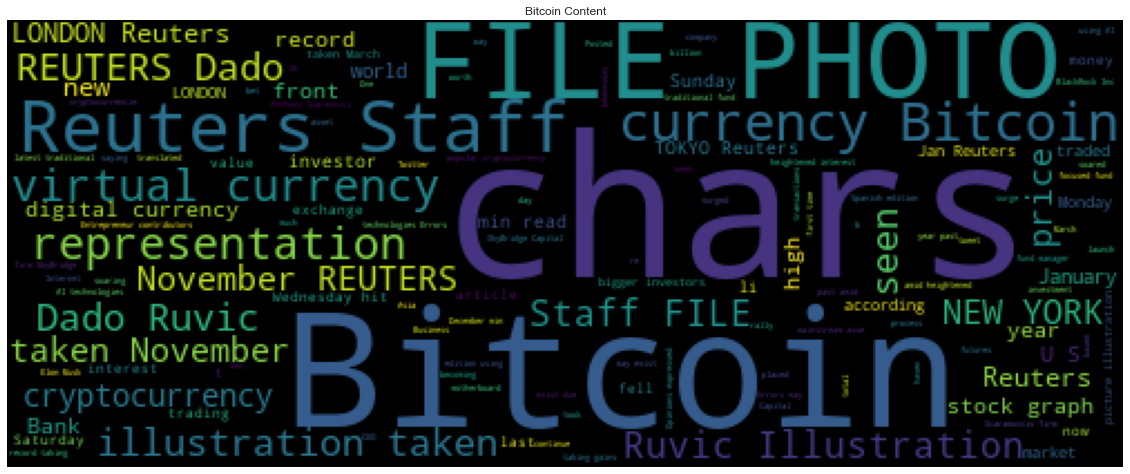

In [26]:
# Generate Bitcoin Word Cloud
wordcloud(btc_df["Text"].str.cat(), '../Resources/btc_word_cloud.png', title='Bitcoin Content')

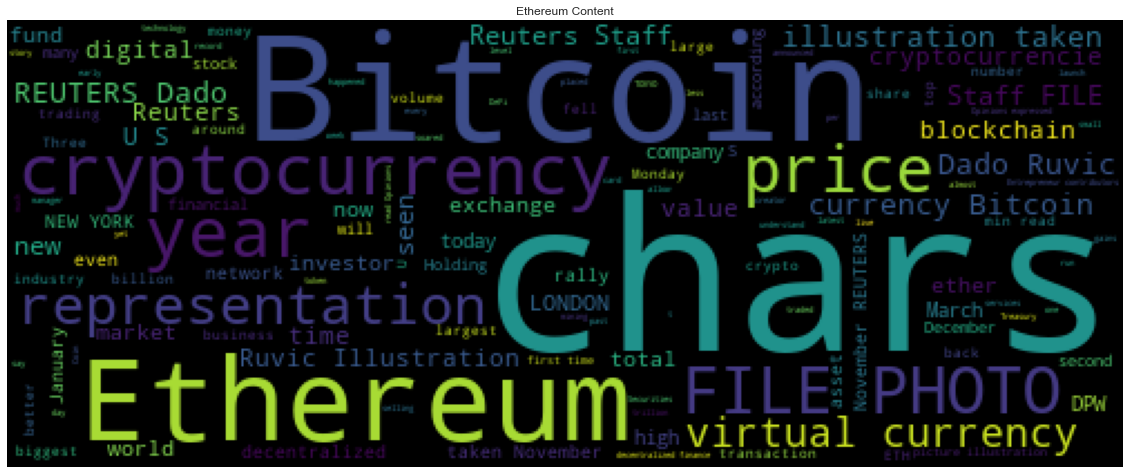

In [27]:
# Generate Ethereum Word Cloud
wordcloud(eth_df["Text"].str.cat(), '../Resources/eth_word_cloud.png', title='Ethereum Content')

# Named Entity Recognition

In [28]:
# Load SpaCy Model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate Bitcoin Text Together
all_btc_text = btc_df["Text"].str.cat()

# Show Text
all_btc_text

'The government of India is considering an 18% tax on all bitcoin transactions, according to a new report from the Times of India. Its not clear whether the proposed goods and services tax (GST) would… [+1397 chars]Just weeks after it shattered its yearslong aspiration of reaching $20,000 in value, Bitcoin is at it again. On Saturday, the cryptocurrency passed $33,000 in value, according to CoinDesk, before dip… [+2123 chars]When Mt. Gox went bankrupt in 2014, it was the world’s largest Bitcoin exchange, holding 850,000 Bitcoins from thousands of users. Now, creditors might finally be able to get a portion of those riche… [+626 chars]Ban reflects Twitters failure to promote healthy conversation\r\nPhoto by Hannah McKay-Pool/Getty Images\r\nTwitter CEO Jack Dorsey, in a series of Tweets, explained that he felt banning US President Don… [+3185 chars]New York (CNN Business)Bitcoin has been flirting with the $30,000 mark for weeks, and finally passed that record-setting level Saturday. The

In [30]:
# Run NER Processor on Text
doc = nlp(all_btc_text)

# Add Title
doc.user_data['title'] = 'Bitcoin Name Entity Recognition'

In [31]:
# Render Visualization
displacy.render(doc, style='ent', jupyter=True)

In [32]:
# Iterate Through Entities
for ent in doc.ents:
    
    # Print Text & Label
    print(ent.text, ent.label_)

India GPE
18% PERCENT
bitcoin GPE
the Times of India ORG
20,000 MONEY
Bitcoin GPE
Saturday DATE
33,000 MONEY
CoinDesk PERSON
Mt. Gox PERSON
2014 DATE
Bitcoin GPE
850,000 CARDINAL
Bitcoins PERSON
thousands CARDINAL
Twitters NORP
Hannah McKay-Pool/Getty PERSON
Twitter ORG
Jack Dorsey PERSON
Tweets GPE
US GPE
Don PERSON
CNN ORG
$30,000 mark MONEY
weeks DATE
Saturday DATE
above $33,000 MONEY
chars]The Securities and Exchange Commission ORG
Gemini PERSON
Blockrize WORK_OF_ART
today DATE
Blockrizes GPE
Later this year DATE
bitcoin GPE
the popular cryptocurrency exchange ORG
Sunday DATE
Bitcoin GPE
50% PERCENT
the previous month DATE
the week DATE
24.8% PERCENT
Bitcoin GPE
12th ORDINAL
Forbes ORG
Fergal Smith PERSON
Maiya Keidan PERSON
Reuters ORG
Canadian NORP
Reuters ORG
LONDON GPE
Dec 30 DATE
Reuters ORG
Bitcoin GPE
Wednesday DATE
a record $28,599.99 MONEY
this year DATE
295% PERCENT
3.5% PERCENT
28,349 MONEY
Alex Castro PERSON
The Verge ORG
Jack Dorsey PERSON
Twitter and Square ORG
Reuter

---

## Ethereum NER

In [33]:
# Concatenate Ethereum Text Together
all_eth_text = eth_df["Text"].str.cat()

# Show Text
all_eth_text

'The Securities and Exchange Commission plans to sue Ripple in federal civil court for selling unregistered securities, according to a news release published online by the cryptocurrency company late … [+2950 chars]Cryptocurrencies stole headlines on the first stock-market trading day of 2021, with bitcoin and ethereum selling off steeply after blistering run-ups over the weekend.\r\nBut investors need not worry … [+2877 chars]NEW YORK (Reuters) - Total investor inflows into cryptocurrency funds and products hit $5.6 billion so far this year, up more than 600% from 2019, according to the latest data from asset manager Coin… [+2077 chars]Ethereum creator Vitalik Buterin.\r\n14 with 11 posters participating\r\nEther, the native currency of the Ethereum network and the second most valuable cryptocurrency, has soared above $1,000 for the fi… [+3015 chars]Bitcoin fizzled in Monday trading as the famously volatile cryptocurrency pulled back after a spectacular new-year rally.\r\nPrices fell 

In [34]:
# Run NER Processor on Text
doc = nlp(all_eth_text)

# Add Title
doc.user_data['title'] = 'Ethereum Name Entity Recognition'

In [35]:
# Render Visualization
displacy.render(doc, style='ent', jupyter=True)

In [36]:
# Iterate Through Entities
for ent in doc.ents:
    
    # Print Text & Label
    print(ent.text, ent.label_)

The Securities and Exchange Commission ORG
first ORDINAL
day of 2021 DATE
bitcoin GPE
the weekend DATE
YORK PERSON
Reuters ORG
$5.6 billion MONEY
this year DATE
more than 600% PERCENT
2019 DATE
Coin ORG
Vitalik Buterin PERSON
14 CARDINAL
11 CARDINAL
Ethereum ORG
second ORDINAL
above $1,000 MONEY
Monday DATE
new-year DATE
as much as 17 CARDINAL
March DATE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
2020 DATE
Las Vegas GPE
dozens CARDINAL
3080 CARDINAL
second ORDINAL
December 2020 DATE
first ORDINAL
Ethereum 2.0 ORG
9, 2021 DATE
7 min QUANTITY
2020 DATE
the year DATE
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
as much as 6% PERCENT
Reuters ORG
Bitcoin GP